<a href="https://colab.research.google.com/github/DEEPABRUNDHA1/CVIP-DataScience-/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data=pd.read_csv("/content/EDA.csv", encoding="latin1")
df=pd.DataFrame(data)
print("Data has been successfully imported")
df.head()

Data has been successfully imported


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Columns: 135 entries, eventid to related
dtypes: float64(77), int64(9), object(49)
memory usage: 1.2+ MB


In [6]:
df.shape

(1212, 135)

In [7]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
for i in df.columns:
    print(i,end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

In [9]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [10]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)

In [11]:
df.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            1212 non-null   int64  
 1   Month           1212 non-null   int64  
 2   Day             1212 non-null   int64  
 3   Country         1212 non-null   object 
 4   Region          1212 non-null   object 
 5   Province/State  1210 non-null   object 
 6   City            1212 non-null   object 
 7   Latitude        1193 non-null   float64
 8   Longitude       1193 non-null   float64
 9   Location        340 non-null    object 
 10  Summary         543 non-null    object 
 11  Attack Type     1211 non-null   object 
 12  Target Type     1211 non-null   object 
 13  Group Name      1211 non-null   object 
 14  Motive          358 non-null    object 
 15  Weapon Type     1211 non-null   object 
 16  Killed          1097 non-null   float64
 17  Wounded         973 non-null    f

In [13]:
df.shape

(1212, 19)

In [14]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
Province/State      2
City                0
Latitude           19
Longitude          19
Location          872
Summary           669
Attack Type         1
Target Type         1
Group Name          1
Motive            854
Weapon Type         1
Killed            115
Wounded           239
Add Notes         776
dtype: int64

In [15]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]

In [ ]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,9678.000000,9678.000000,9678.000000,9375.000000,9375.000000,9678.000000,9678.000000,9678.000000
mean,1975.978818,6.292726,15.166253,33.115933,-20.935989,0.717607,0.810395,1.528002
std,2.890883,3.371763,9.012074,22.181102,53.271695,5.393067,6.234665,8.788749
min,1970.000000,0.000000,0.000000,-45.867889,-157.818968,0.000000,0.000000,0.000000
25%,1974.000000,3.000000,7.000000,24.801598,-73.931351,0.000000,0.000000,0.000000
50%,1977.000000,6.000000,15.000000,40.697132,-5.956210,0.000000,0.000000,0.000000
75%,1979.000000,9.000000,23.000000,46.496714,11.115921,1.000000,0.000000,1.000000
max,1979.000000,12.000000,31.000000,64.837778,172.636225,422.000000,285.000000,422.000000


In [16]:
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,90


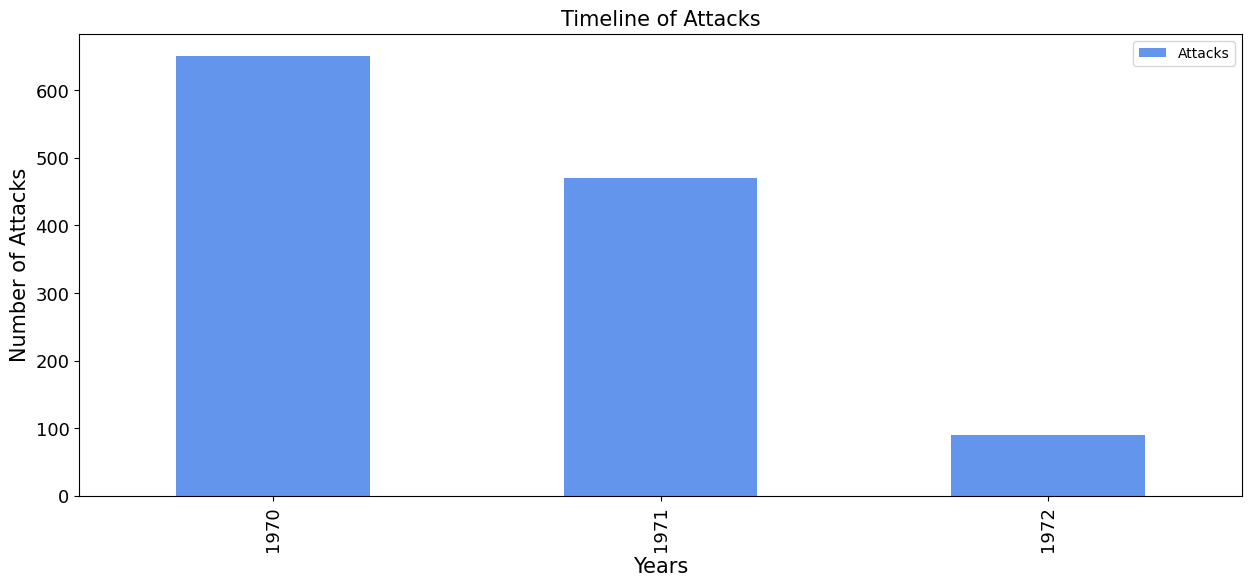

In [17]:
attacks.plot(kind="bar",color="cornflowerblue",figsize=(15,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

In [18]:
yc=df[["Year","Casualty"]].groupby("Year").sum()
yc.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,334.0


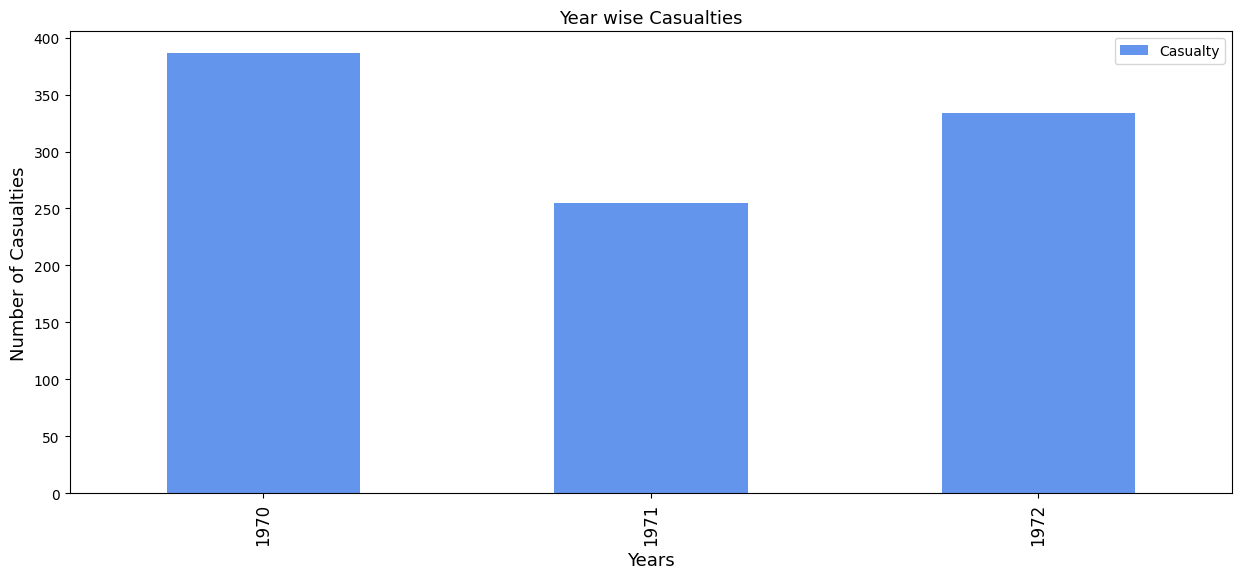

In [19]:
yc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Year wise Casualties",fontsize=13)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [20]:
yk=df[["Year","Killed"]].groupby("Year").sum()
yk.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,94.0


In [21]:
yw=df[["Year","Wounded"]].groupby("Year").sum()
yw.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,240.0


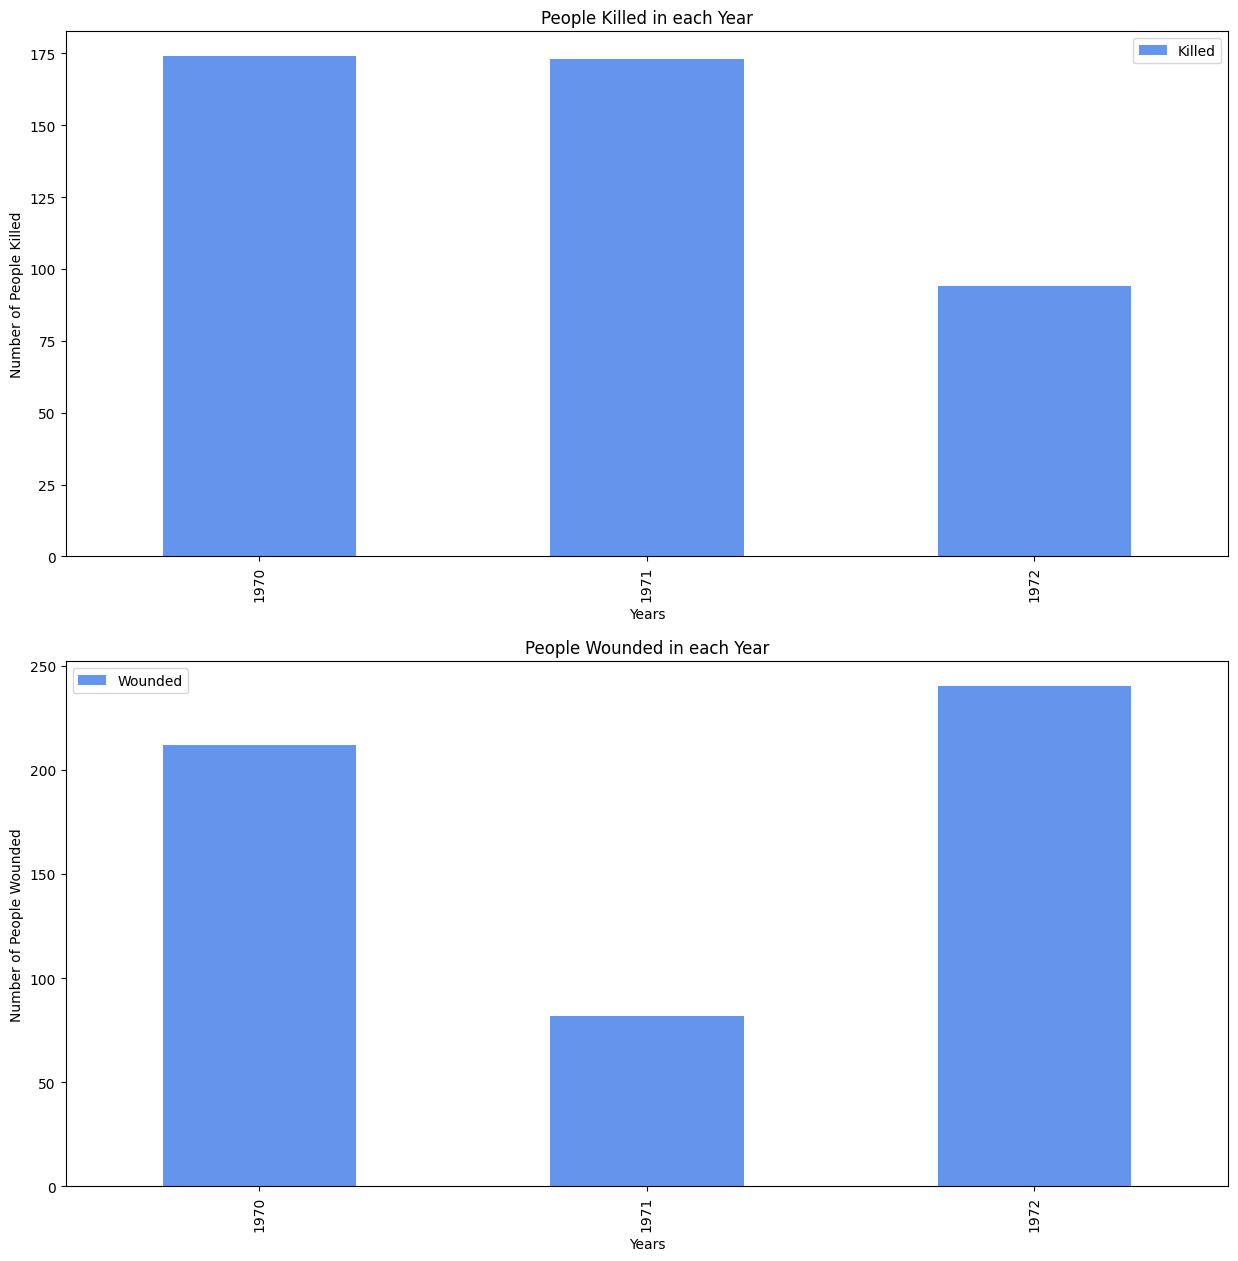

In [22]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Killed
yk.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed")

#Wounded
yw.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of People Wounded")

plt.show()

In [23]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,
1970,1,7,2,12,28,472,65,1,10,3,50
1971,1,5,1,5,55,247,24,0,6,2,125
1972,0,1,0,1,7,26,2,1,1,0,51


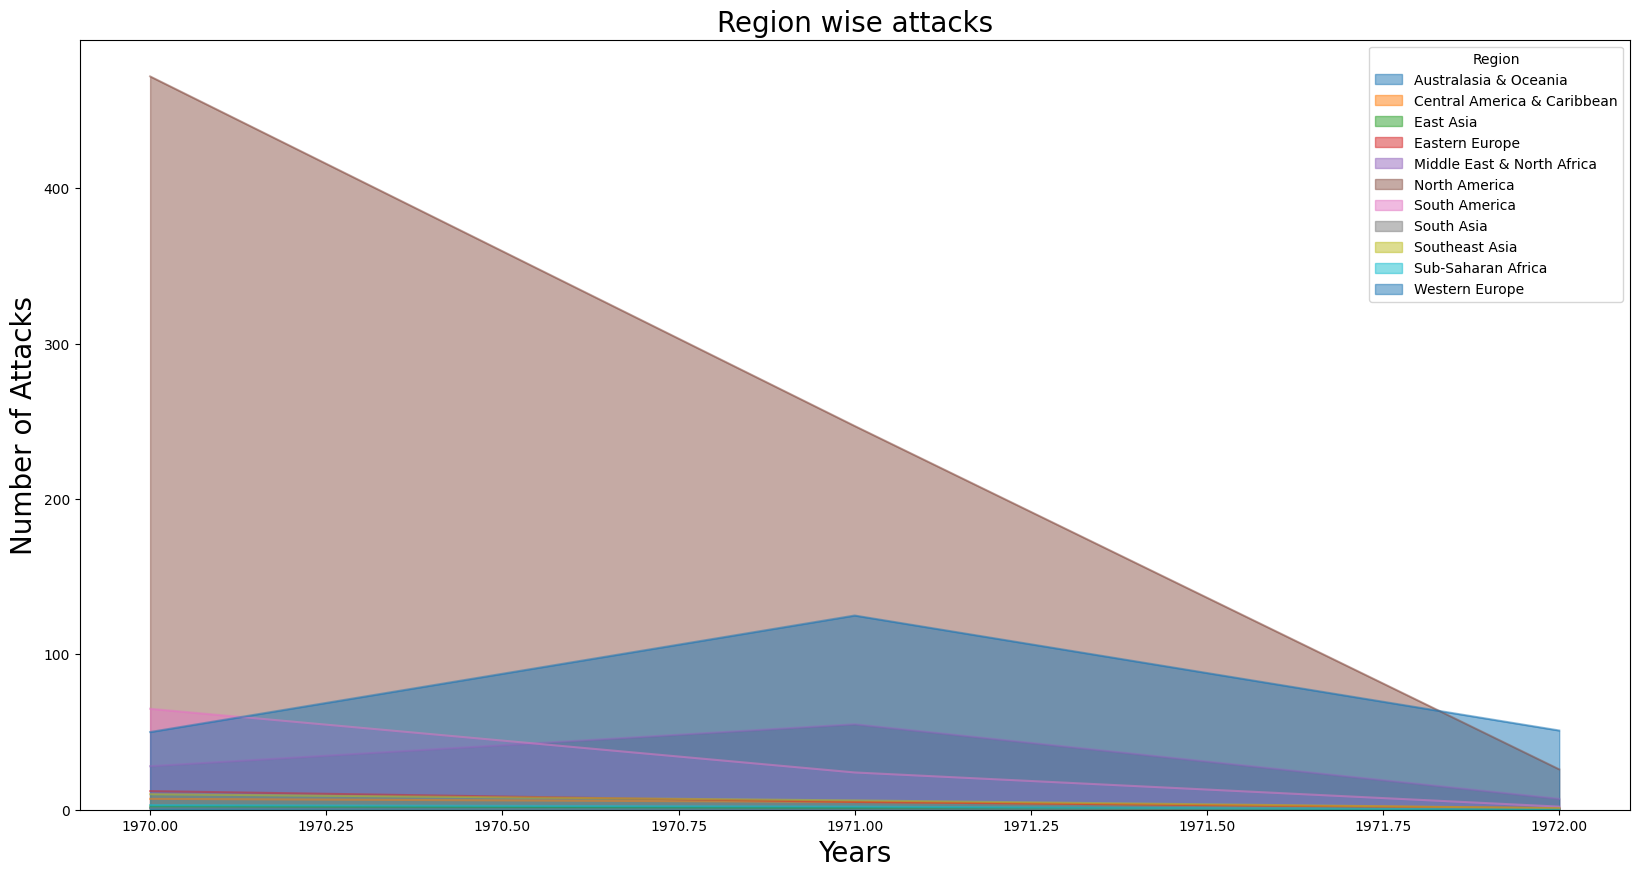

In [24]:
reg.plot(kind="area", stacked=False, alpha=0.5,figsize=(20,10))
plt.title("Region wise attacks",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

In [25]:
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
ra=regt["Total"].sort_values(ascending=False)
ra

Region
North America                  745
Western Europe                 226
South America                   91
Middle East & North Africa      90
Eastern Europe                  18
Southeast Asia                  17
Central America & Caribbean     13
Sub-Saharan Africa               5
East Asia                        3
Australasia & Oceania            2
South Asia                       2
Name: Total, dtype: int64

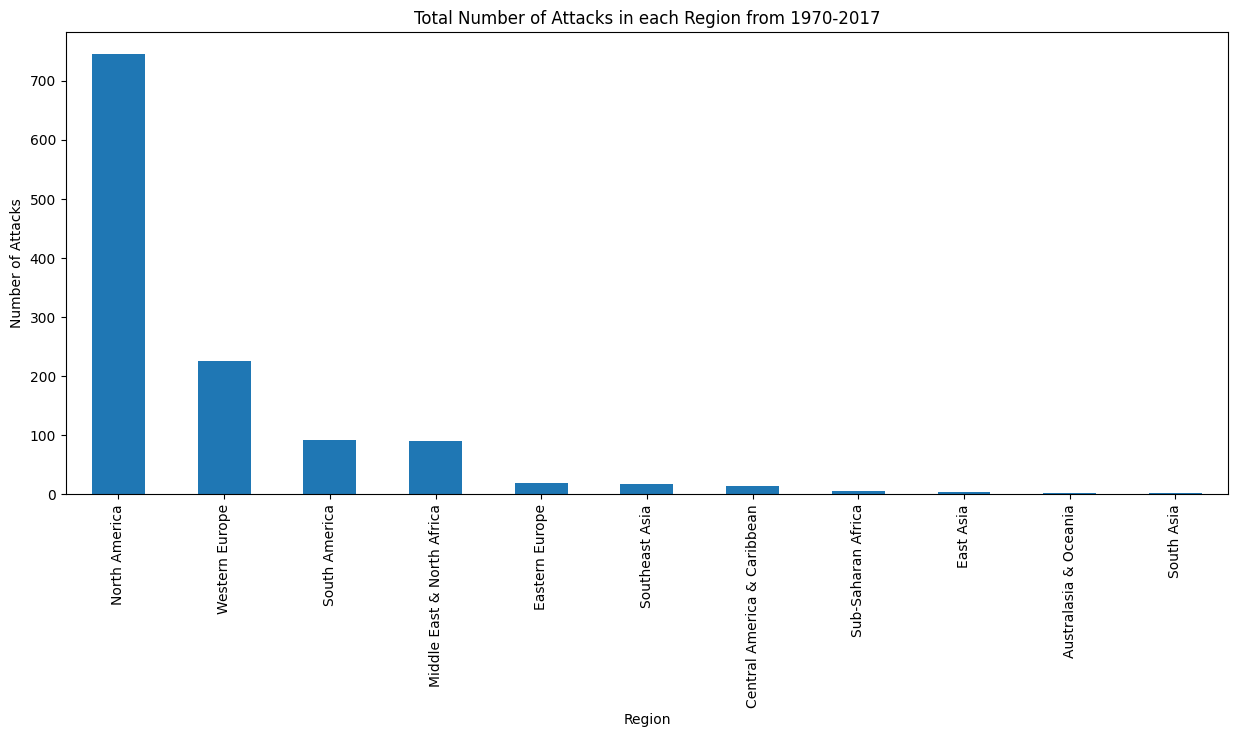

In [26]:
ra.plot(kind="bar",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

In [27]:
rc=df[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)
rc

,Casualty
Region,
Western Europe,492.0
North America,287.0
Southeast Asia,66.0
Middle East & North Africa,28.0
Eastern Europe,26.0
East Asia,25.0
South Asia,24.0
South America,22.0
Central America & Caribbean,3.0


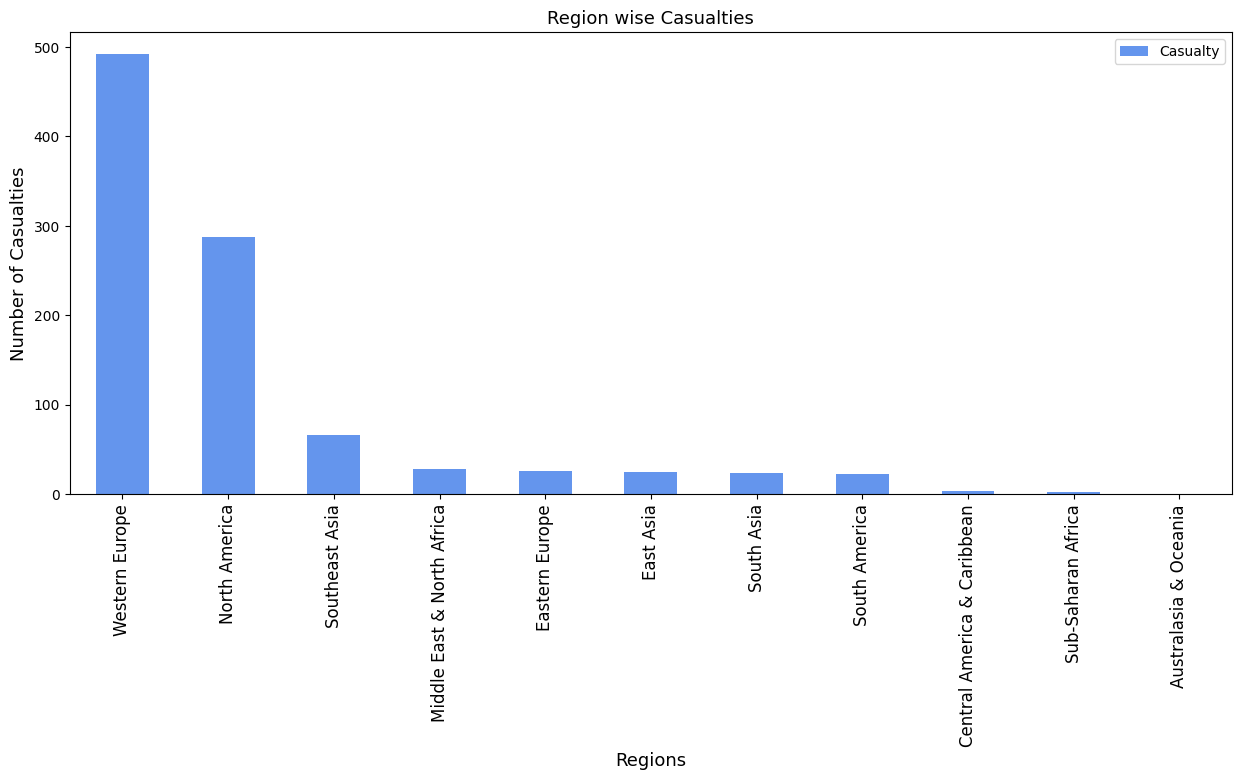

In [28]:
rc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Region wise Casualties",fontsize=13)
plt.xlabel("Regions",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [29]:
rk=df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
rk

,Killed
Region,
Western Europe,254.0
North America,58.0
Southeast Asia,43.0
Eastern Europe,26.0
East Asia,25.0
South America,17.0
Middle East & North Africa,9.0
South Asia,4.0
Central America & Caribbean,3.0


In [30]:
rw=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
rw


,Wounded
Region,
Western Europe,238.0
North America,229.0
Southeast Asia,23.0
South Asia,20.0
Middle East & North Africa,19.0
South America,5.0
Australasia & Oceania,0.0
Central America & Caribbean,0.0
East Asia,0.0


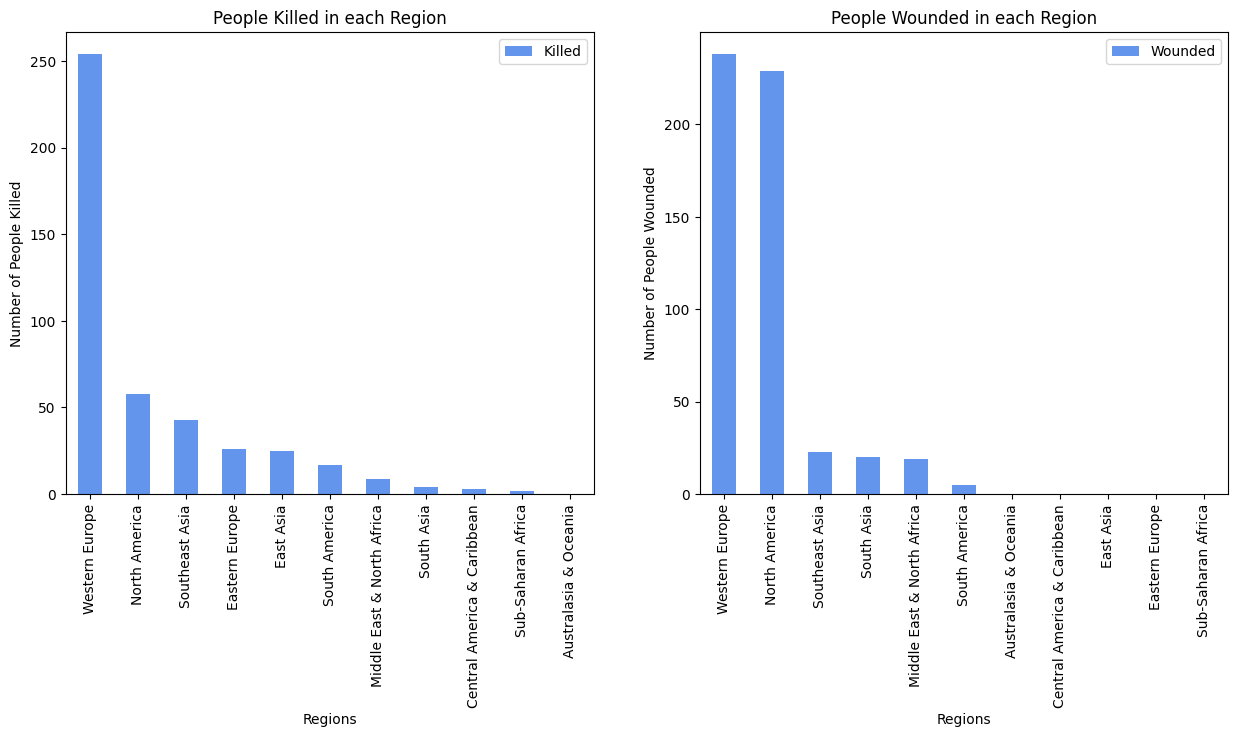

In [31]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
rk.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

#Wounded
rw.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show()

In [32]:
ct=df["Country"].value_counts().head(10)
ct

United States         741
United Kingdom        131
Turkey                 48
Uruguay                41
West Germany (FRG)     36
Spain                  33
Argentina              29
Iran                   19
East Germany (GDR)     16
Philippines            15
Name: Country, dtype: int64

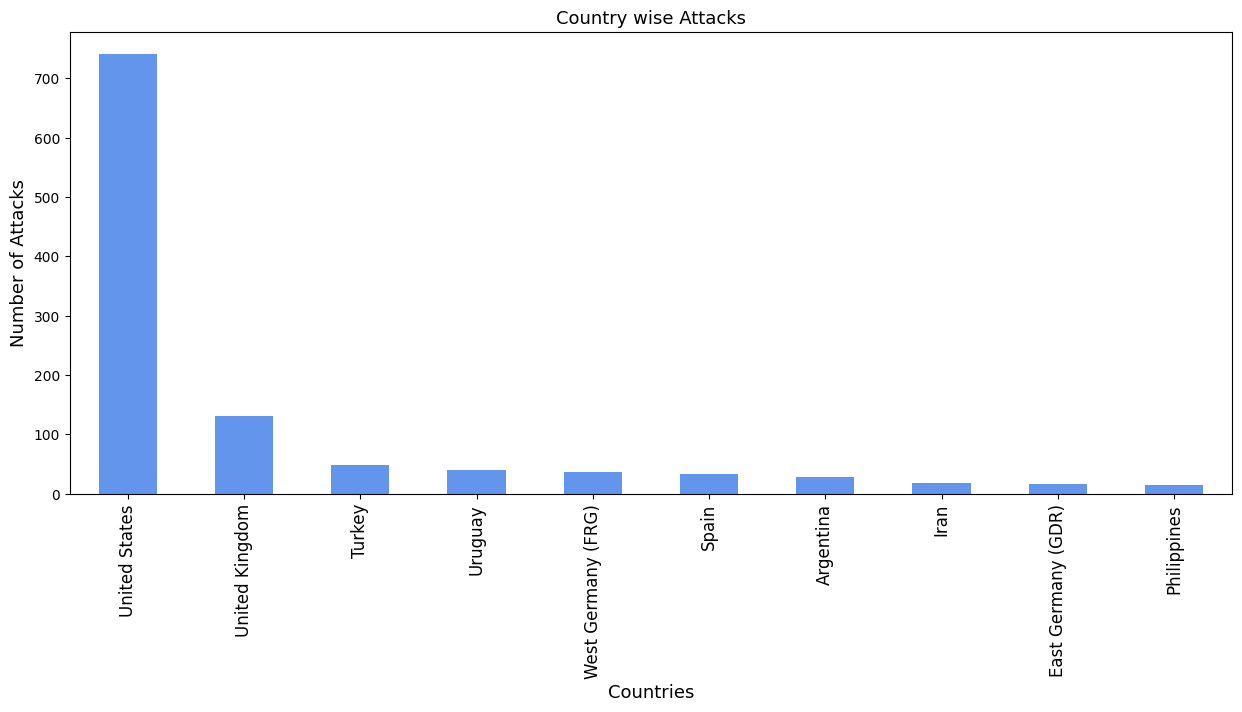

In [33]:
ct.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country wise Attacks",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [34]:
cnc=df[["Country","Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False)
cnc.head(10)

,Casualty
Country,
United Kingdom,416.0
United States,286.0
Philippines,54.0
Switzerland,50.0
Czechoslovakia,26.0
Taiwan,25.0
Pakistan,24.0
West Germany (FRG),18.0
Argentina,12.0


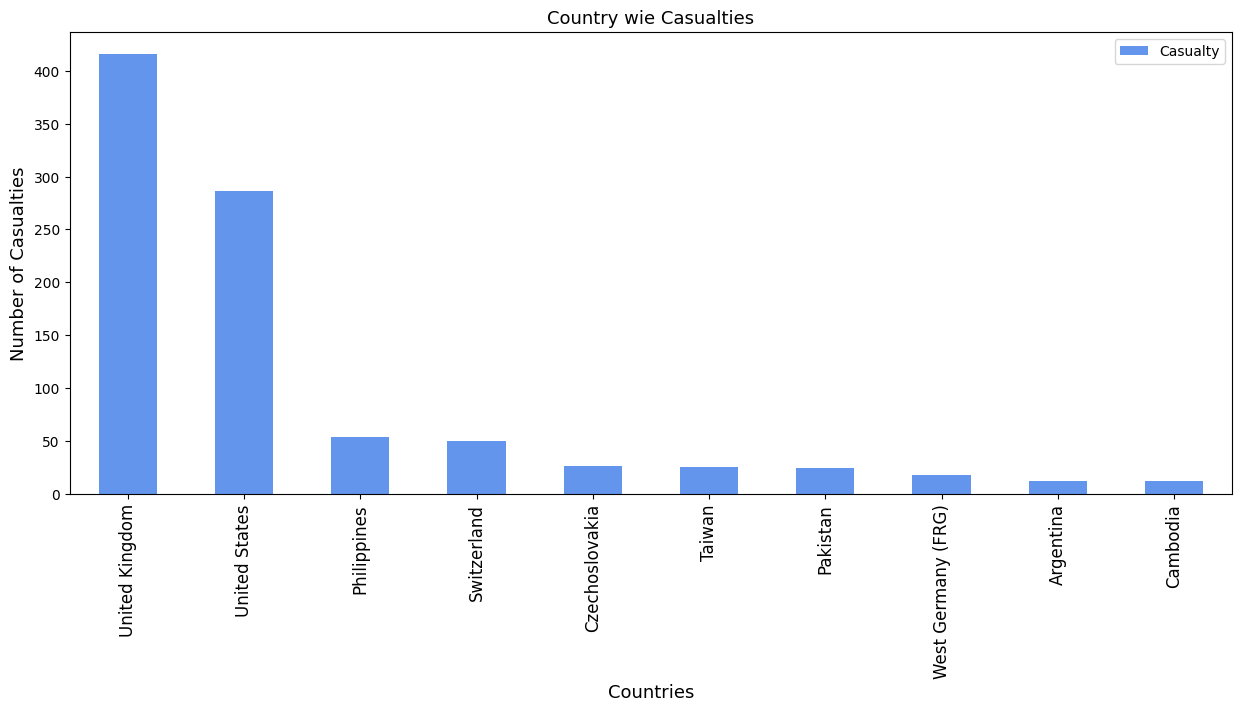

In [35]:
cnc[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country wie Casualties",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [36]:
cnk=df[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False)
cnk.head(10)

,Killed
Country,
United Kingdom,192.0
United States,57.0
Switzerland,47.0
Philippines,41.0
Czechoslovakia,26.0
Taiwan,25.0
Argentina,10.0
West Germany (FRG),9.0
Uruguay,4.0


In [37]:
cnw=df[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
cnw.head(10)

,Wounded
Country,
United States,229.0
United Kingdom,224.0
Pakistan,20.0
Philippines,13.0
Israel,11.0
Cambodia,10.0
West Germany (FRG),9.0
West Bank and Gaza Strip,3.0
Switzerland,3.0


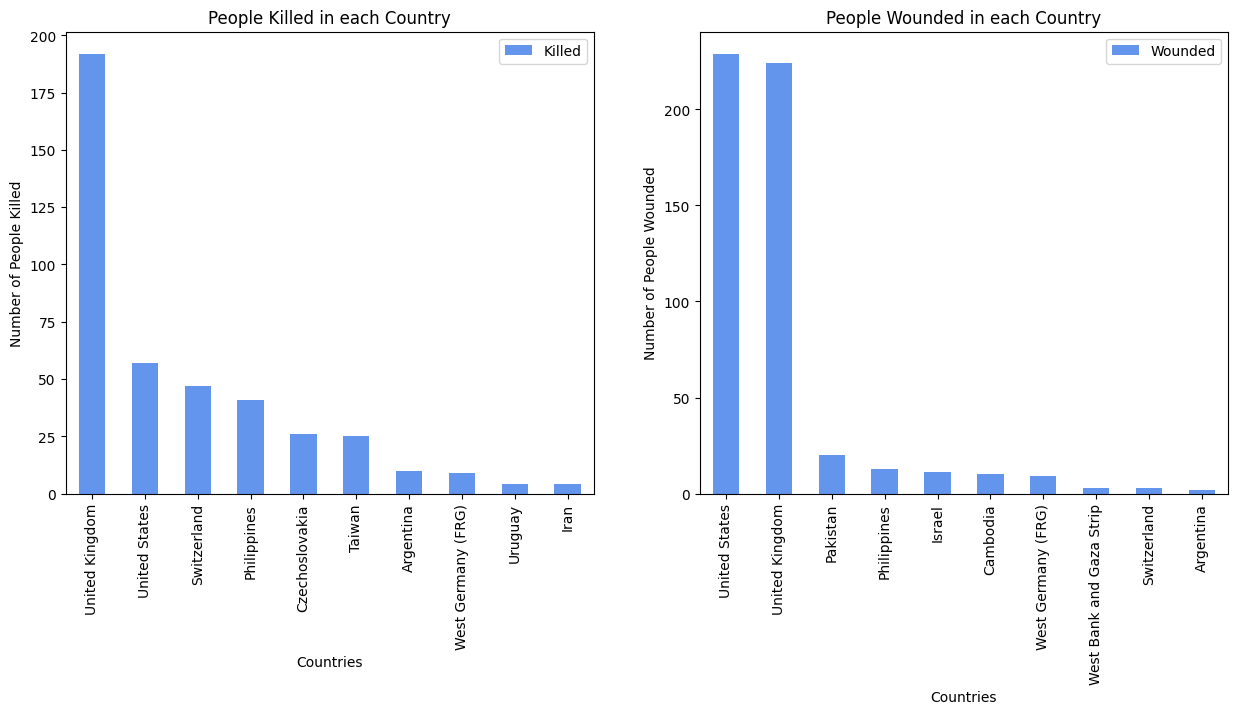

In [38]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
cnk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Country")
ax0.set_xlabel("Countries")
ax0.set_ylabel("Number of People Killed")

#Wounded
cnw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Country")
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of People Wounded")

plt.show()

In [39]:
city=df["City"].value_counts()[1:11]
city

Belfast          76
Los Angeles      43
Montevideo       41
Ankara           33
San Francisco    26
Berkeley         22
Unknown          21
Seattle          18
San Juan         16
Berlin           16
Name: City, dtype: int64

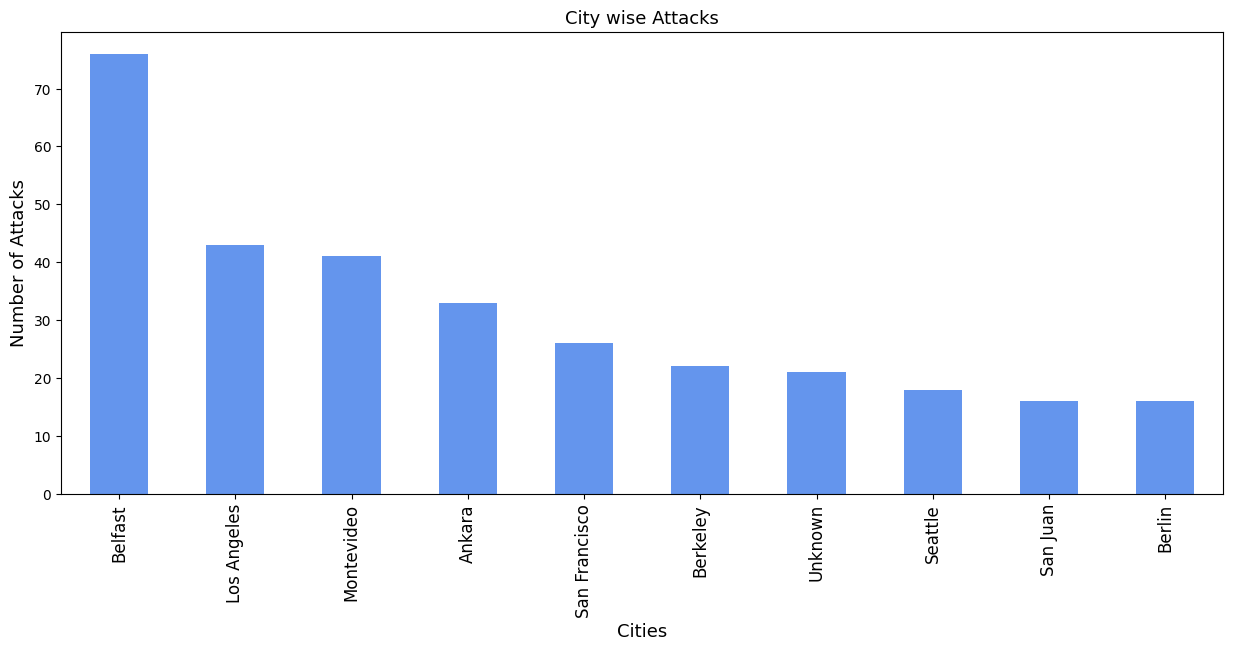

In [40]:
city.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("City wise Attacks",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [41]:
cc=df[["City","Casualty"]].groupby("City").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
cc.head(10)

,Casualty
City,
Belfast,317.0
New York City,80.0
Zurich,47.0
Cauayan,36.0
Aldershot,33.0
Norman,27.0
Karachi,24.0
Des Moines,22.0
Londonderry,21.0


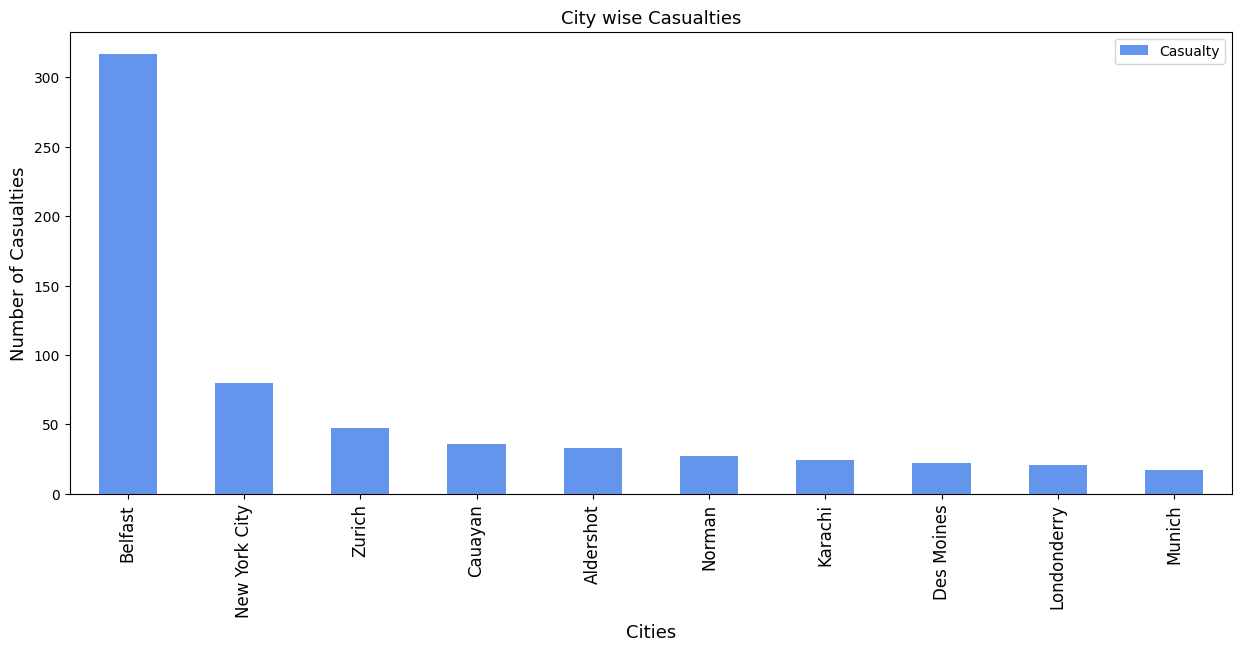

In [42]:
cc[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("City wise Casualties",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [43]:
ck=df[["City","Killed"]].groupby("City").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
ck.head(10)

,Killed
City,
Belfast,113.0
Zurich,47.0
Cauayan,36.0
Londonderry,21.0
Aldershot,14.0
New York City,9.0
Munich,8.0
San Juan,5.0
Trillick,5.0


In [44]:
cw=df[["City","Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
cw.head(10)

,Wounded
City,
Belfast,204.0
New York City,71.0
Norman,27.0
Des Moines,22.0
Karachi,20.0
Aldershot,19.0
Berkeley,14.0
Roxas,12.0
Jerusalem,11.0


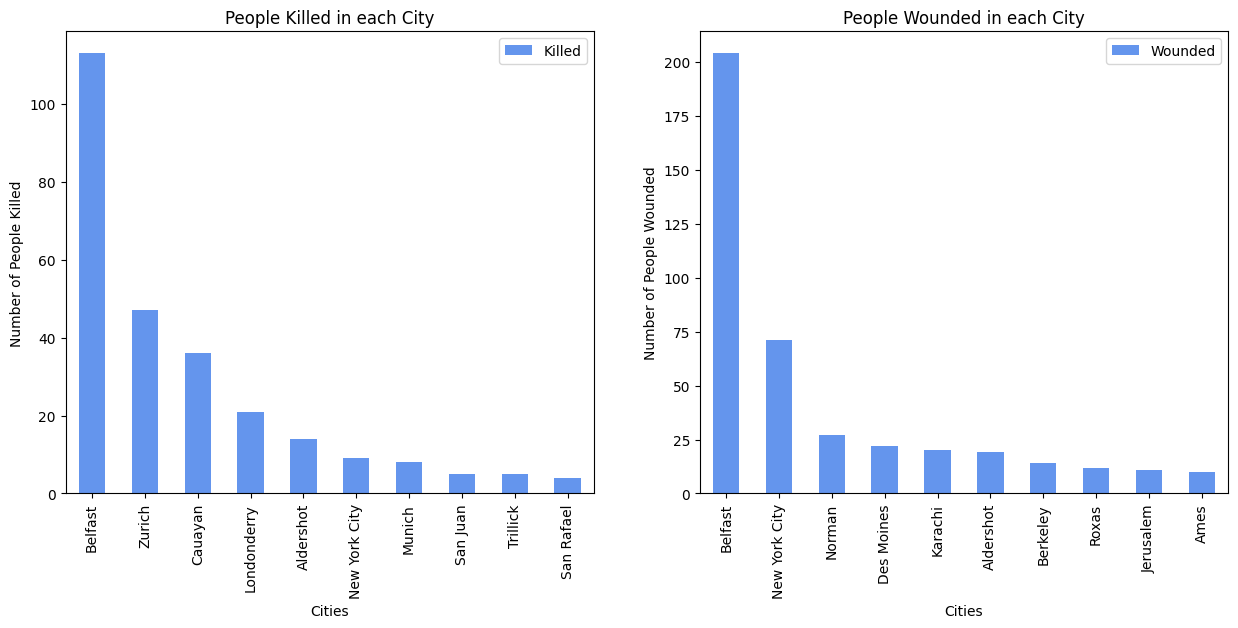

In [45]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ck[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each City")
ax0.set_xlabel("Cities")
ax0.set_ylabel("Number of People Killed")

#Wounded
cw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each City")
ax1.set_xlabel("Cities")
ax1.set_ylabel("Number of People Wounded")

plt.show()

In [46]:
grp=df["Group Name"].value_counts()[1:10]
grp

Left-Wing Militants                 165
Irish Republican Army (IRA)          96
Black Nationalists                   82
Student Radicals                     70
Tupamaros (Uruguay)                  41
White extremists                     39
Weather Underground, Weathermen      33
Turkish People's Liberation Army     30
Chicano Liberation Front             26
Name: Group Name, dtype: int64

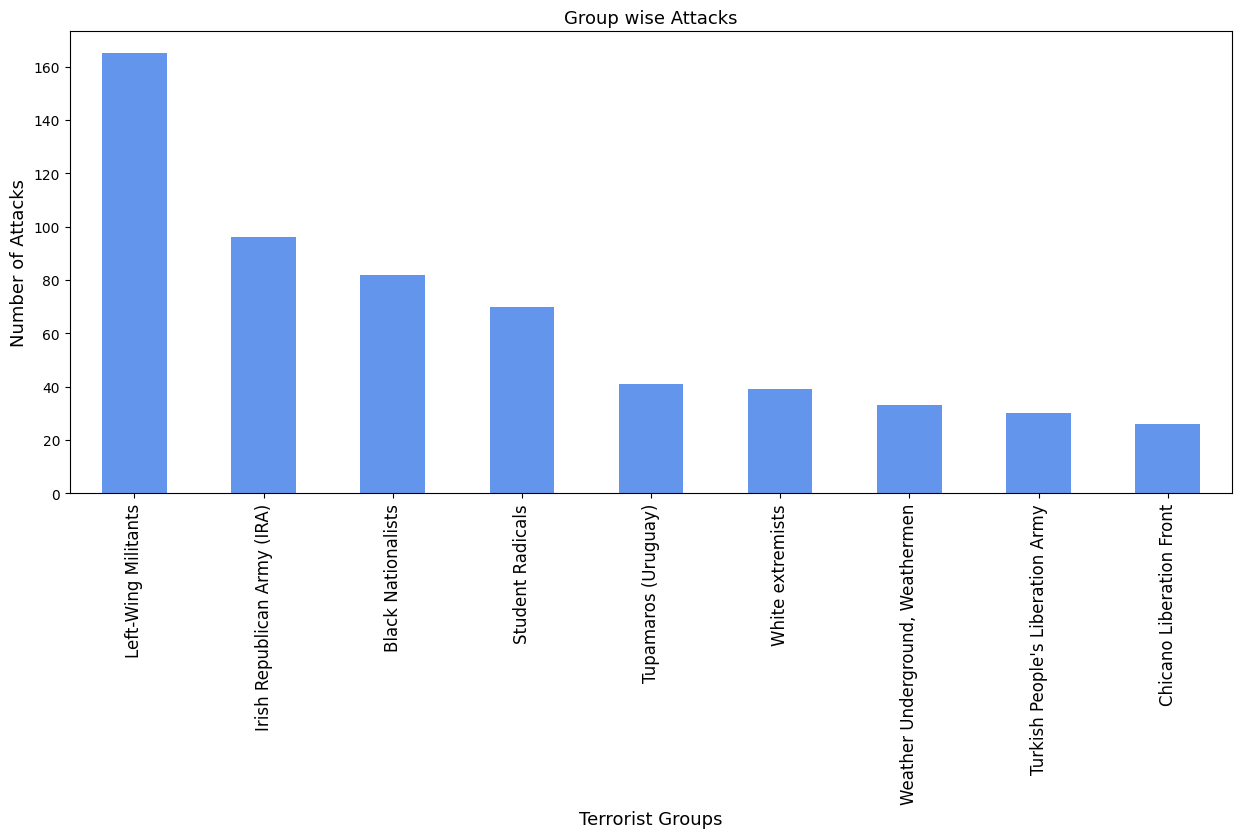

In [49]:
grp.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Group wise Attacks",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [50]:
gc=df[["Group Name","Casualty"]].groupby("Group Name").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
gc.head(10)

,Casualty
Group Name,
Irish Republican Army (IRA),305.0
Black Panthers,73.0
"Popular Front for the Liberation of Palestine, Gen Cmd (PFLP-GC)",47.0
Black Nationalists,46.0
White extremists,37.0
Croatian Nationalists,29.0
Ulster Volunteer Force (UVF),22.0
Popular Front for the Liberation of Palestine (PFLP),19.0
Jewish Defense League (JDL),18.0


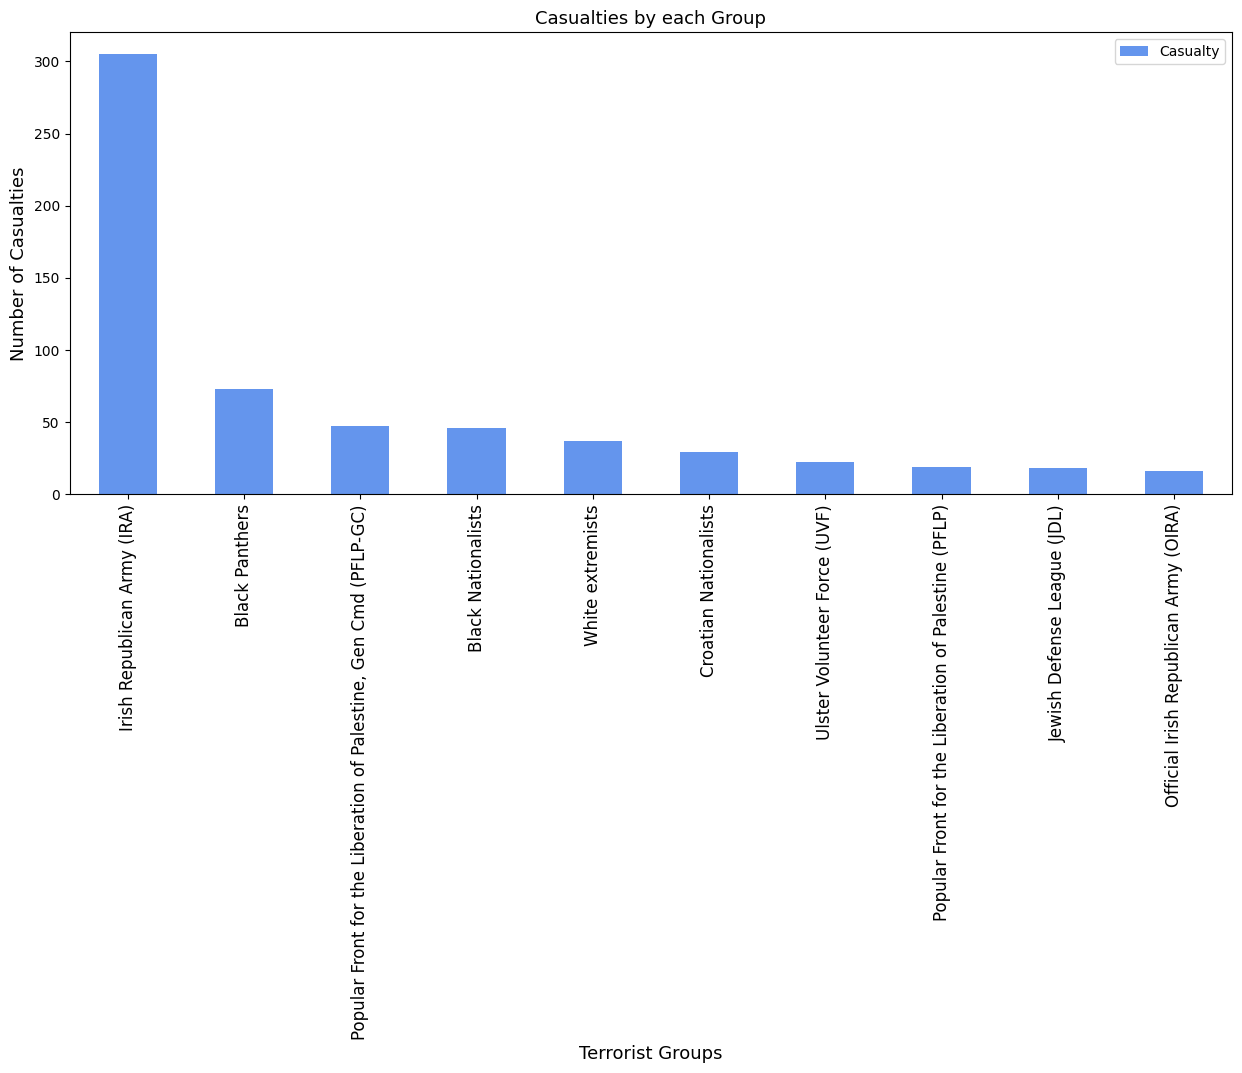

In [51]:
gc.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties by each Group",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [52]:
gk=df[["Group Name","Killed"]].groupby("Group Name").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
gk.head(10)

,Killed
Group Name,
Irish Republican Army (IRA),139.0
"Popular Front for the Liberation of Palestine, Gen Cmd (PFLP-GC)",47.0
Croatian Nationalists,27.0
Ulster Volunteer Force (UVF),21.0
Black Nationalists,16.0
Official Irish Republican Army (OIRA),16.0
Black Liberation Army,11.0
Popular Front for the Liberation of Palestine (PFLP),10.0
Irish Republican Extremists,8.0


In [53]:
gw=df[["Group Name","Wounded"]].groupby("Group Name").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
gw.head(10)

,Wounded
Group Name,
Irish Republican Army (IRA),166.0
Black Panthers,68.0
White extremists,32.0
Black Nationalists,30.0
Jewish Defense League (JDL),16.0
Stop the War Coalition,12.0
Armed Revolutionary Independence Movement (MIRA),11.0
Popular Front for the Liberation of Palestine (PFLP),9.0
Left-Wing Militants,6.0


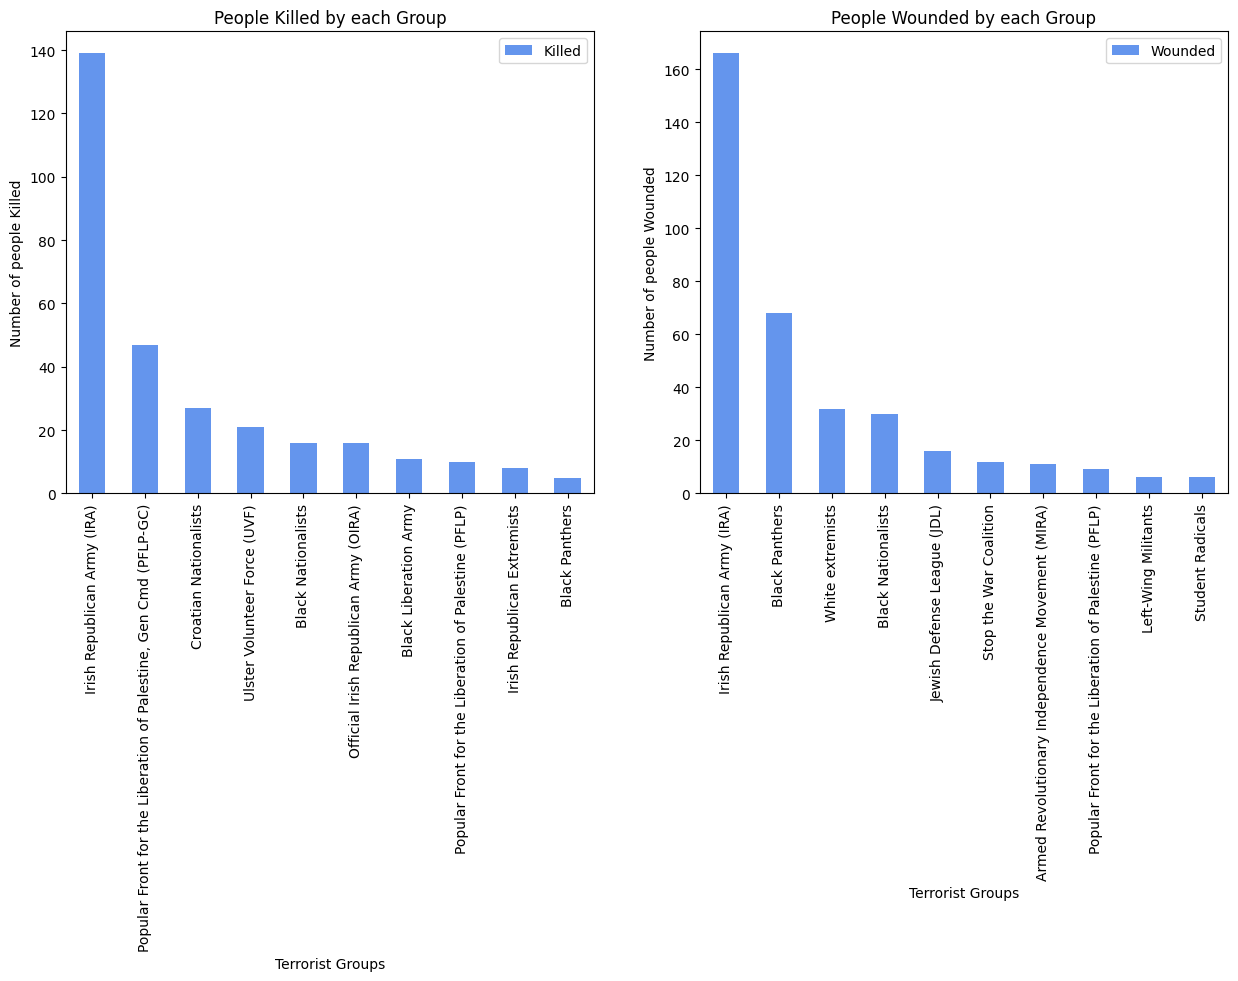

In [54]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
gk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed by each Group")
ax0.set_xlabel("Terrorist Groups")
ax0.set_ylabel("Number of people Killed")

#Wounded
gw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded by each Group")
ax1.set_xlabel("Terrorist Groups")
ax1.set_ylabel("Number of people Wounded")
plt.show()

In [55]:
at=df["Attack Type"].value_counts()
at

Bombing/Explosion                      623
Facility/Infrastructure Attack         269
Assassination                          115
Armed Assault                          109
Hostage Taking (Kidnapping)             60
Hijacking                               19
Unknown                                  9
Hostage Taking (Barricade Incident)      4
Unarmed Assault                          3
Name: Attack Type, dtype: int64

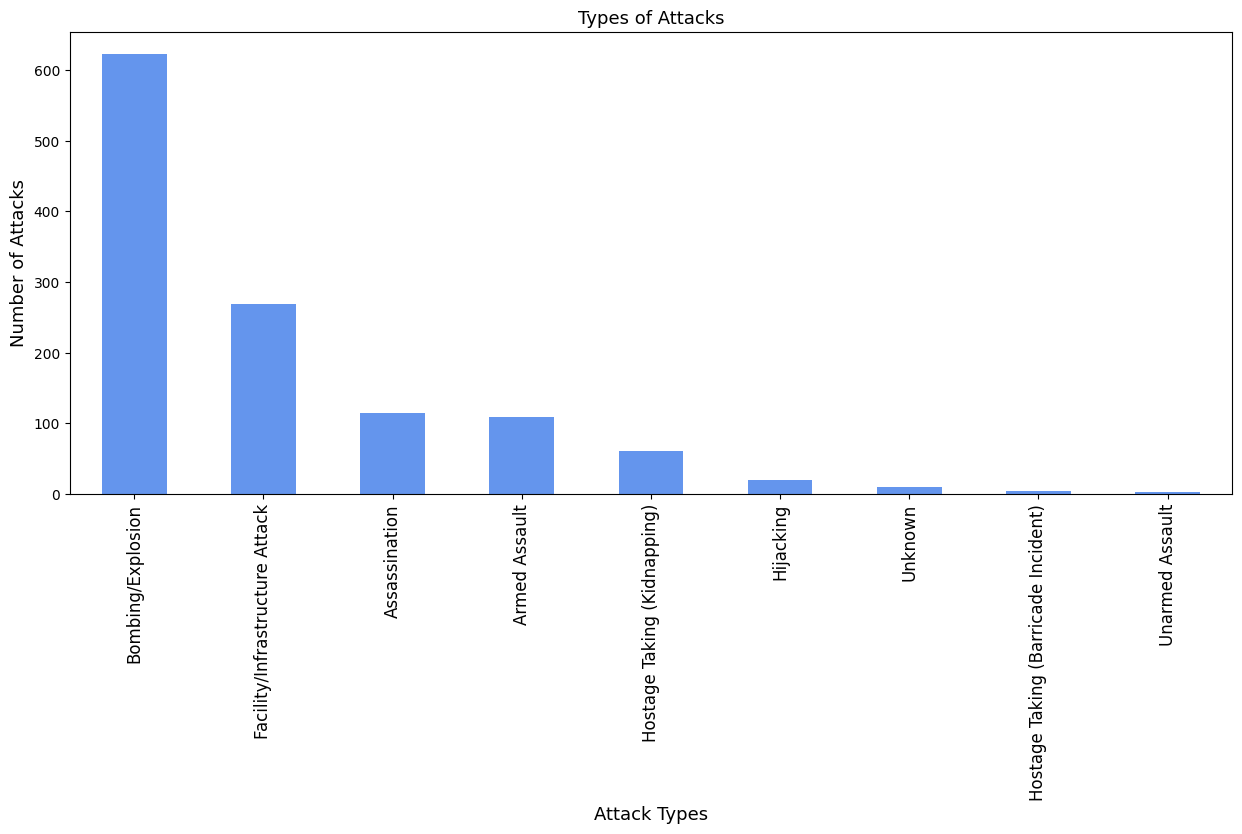

In [56]:
at.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Types of Attacks",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [57]:
ac=df[["Attack Type","Casualty"]].groupby("Attack Type").sum().sort_values(by="Casualty",ascending=False)
ac

,Casualty
Attack Type,
Bombing/Explosion,626.0
Assassination,154.0
Armed Assault,90.0
Facility/Infrastructure Attack,71.0
Hostage Taking (Kidnapping),17.0
Unknown,10.0
Unarmed Assault,5.0
Hijacking,2.0
Hostage Taking (Barricade Incident),0.0


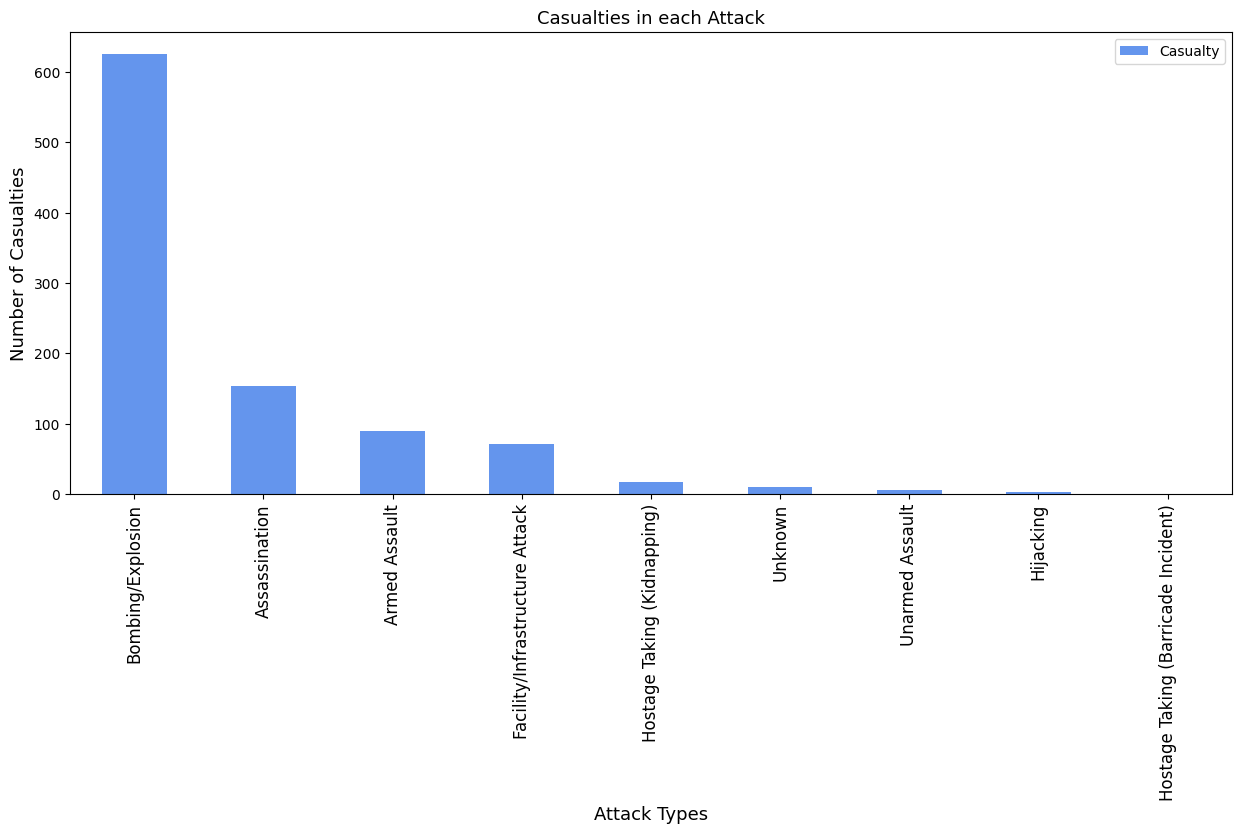

In [58]:
ac.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties in each Attack",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [59]:
ak=df[["Attack Type","Killed"]].groupby("Attack Type").sum().sort_values(by="Killed",ascending=False)
ak

,Killed
Attack Type,
Bombing/Explosion,242.0
Assassination,114.0
Armed Assault,52.0
Hostage Taking (Kidnapping),13.0
Facility/Infrastructure Attack,11.0
Unknown,8.0
Hijacking,1.0
Hostage Taking (Barricade Incident),0.0
Unarmed Assault,0.0


In [60]:
aw=df[["Attack Type","Wounded"]].groupby("Attack Type").sum().sort_values(by="Wounded",ascending=False)
aw

,Wounded
Attack Type,
Bombing/Explosion,384.0
Facility/Infrastructure Attack,60.0
Assassination,40.0
Armed Assault,38.0
Unarmed Assault,5.0
Hostage Taking (Kidnapping),4.0
Unknown,2.0
Hijacking,1.0
Hostage Taking (Barricade Incident),0.0


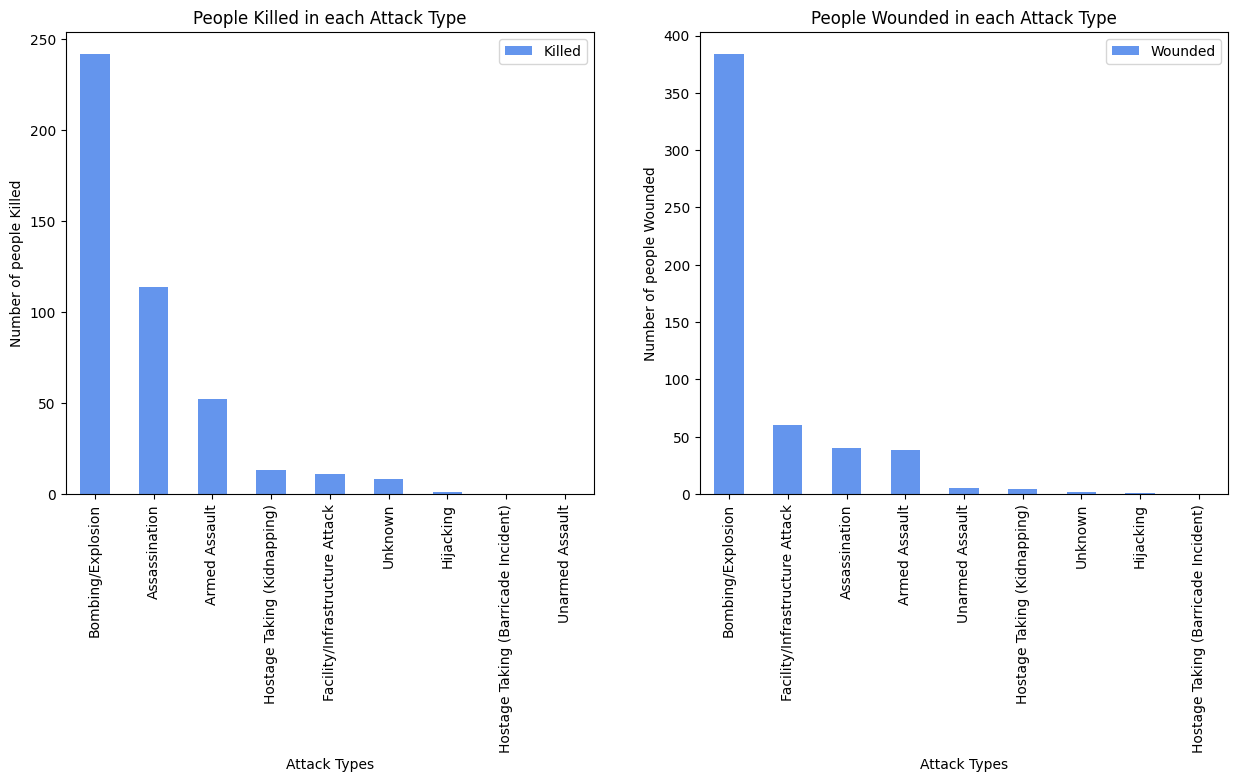

In [61]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ak.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Attack Type")
ax0.set_xlabel("Attack Types")
ax0.set_ylabel("Number of people Killed")

#Wounded
aw.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Attack Type")
ax1.set_xlabel("Attack Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()

In [62]:
ta=df["Target Type"].value_counts()
ta

Business                          289
Military                          209
Government (General)              130
Police                            127
Educational Institution           105
Private Citizens & Property        95
Government (Diplomatic)            92
Airports & Aircraft                40
Utilities                          31
Journalists & Media                22
Religious Figures/Institutions     17
NGO                                11
Telecommunication                  10
Transportation                      8
Terrorists/Non-State Militia        6
Tourists                            6
Unknown                             4
Violent Political Party             3
Maritime                            3
Food or Water Supply                2
Other                               1
Name: Target Type, dtype: int64

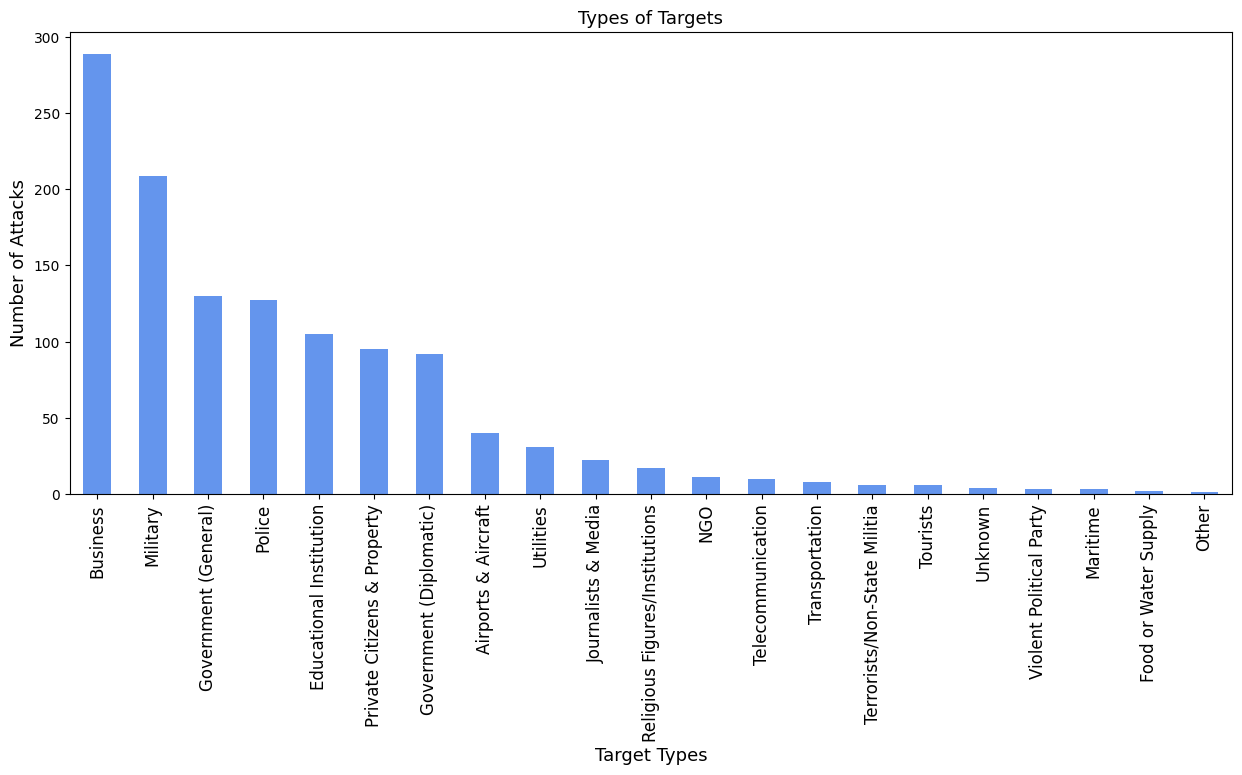

In [63]:
ta.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Types of Targets",fontsize=13)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [64]:
tc=df[["Target Type","Casualty"]].groupby("Target Type").sum().sort_values(by="Casualty",ascending=False)
tc

,Casualty
Target Type,
Business,248.0
Military,162.0
Airports & Aircraft,152.0
Private Citizens & Property,131.0
Police,123.0
Government (Diplomatic),53.0
Educational Institution,48.0
Government (General),19.0
Terrorists/Non-State Militia,14.0


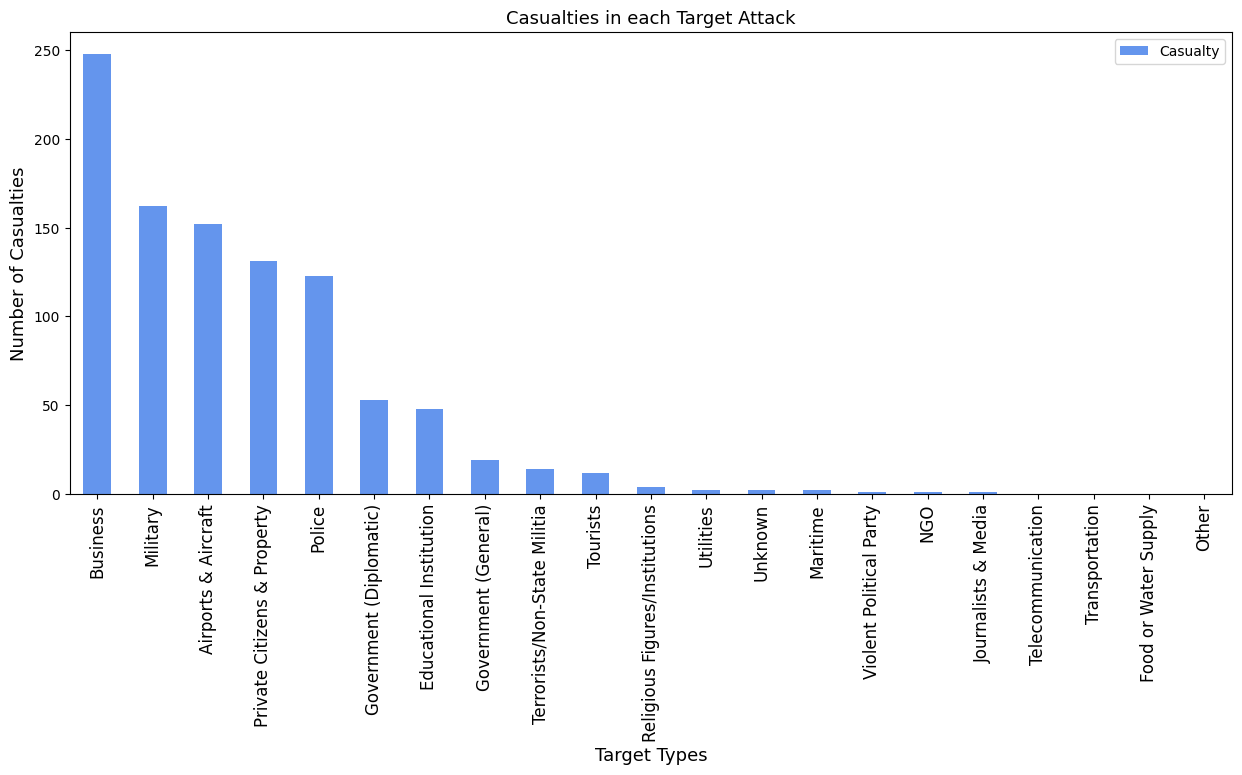

In [65]:
tc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties in each Target Attack",fontsize=13)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [66]:
tk=df[["Target Type","Killed"]].groupby("Target Type").sum().sort_values(by="Killed",ascending=False)
tk

,Killed
Target Type,
Airports & Aircraft,137.0
Military,103.0
Police,54.0
Private Citizens & Property,49.0
Business,46.0
Government (Diplomatic),15.0
Government (General),14.0
Terrorists/Non-State Militia,11.0
Religious Figures/Institutions,3.0


In [67]:
tw=df[["Target Type","Wounded"]].groupby("Target Type").sum().sort_values(by="Wounded",ascending=False)
tw

,Wounded
Target Type,
Business,202.0
Private Citizens & Property,82.0
Police,69.0
Military,59.0
Educational Institution,48.0
Government (Diplomatic),38.0
Airports & Aircraft,15.0
Tourists,11.0
Government (General),5.0


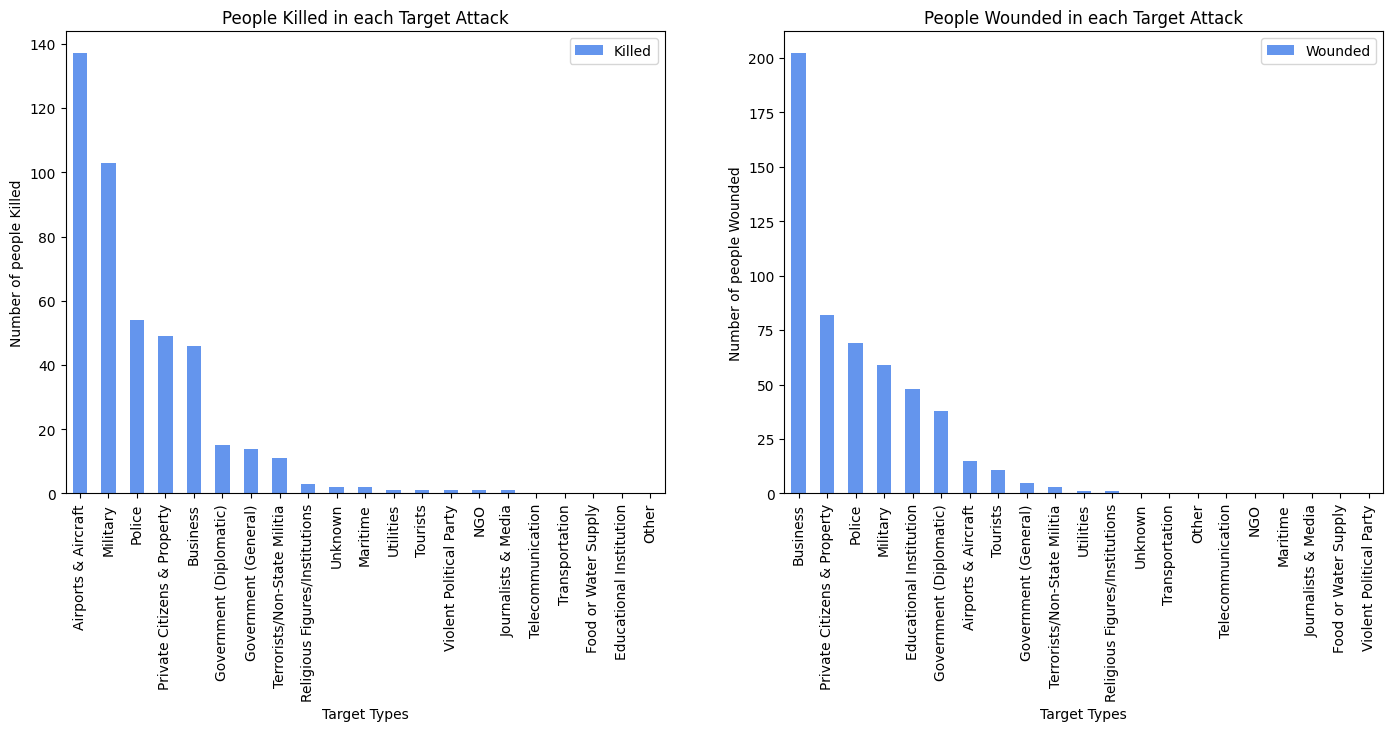

In [68]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
tk.plot(kind="bar",color="cornflowerblue",figsize=(17,6),ax=ax0)
ax0.set_title("People Killed in each Target Attack")
ax0.set_xlabel("Target Types")
ax0.set_ylabel("Number of people Killed")

#Wounded
tw.plot(kind="bar",color="cornflowerblue",figsize=(17,6),ax=ax1)
ax1.set_title("People Wounded in each Target Attack")
ax1.set_xlabel("Target Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()

In [69]:
gca=df[["Group Name","Country"]].value_counts().drop("Unknown")
gca.head(10)

<ipython-input-69-e3f050b9d645>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gca=df[["Group Name","Country"]].value_counts().drop("Unknown")


Group Name                                        Country       
Left-Wing Militants                               United States     165
Irish Republican Army (IRA)                       United Kingdom     95
Black Nationalists                                United States      82
Student Radicals                                  United States      70
Tupamaros (Uruguay)                               Uruguay            41
White extremists                                  United States      39
Weather Underground, Weathermen                   United States      33
Turkish People's Liberation Army                  Turkey             30
Armed Revolutionary Independence Movement (MIRA)  United States      26
Chicano Liberation Front                          United States      26
dtype: int64

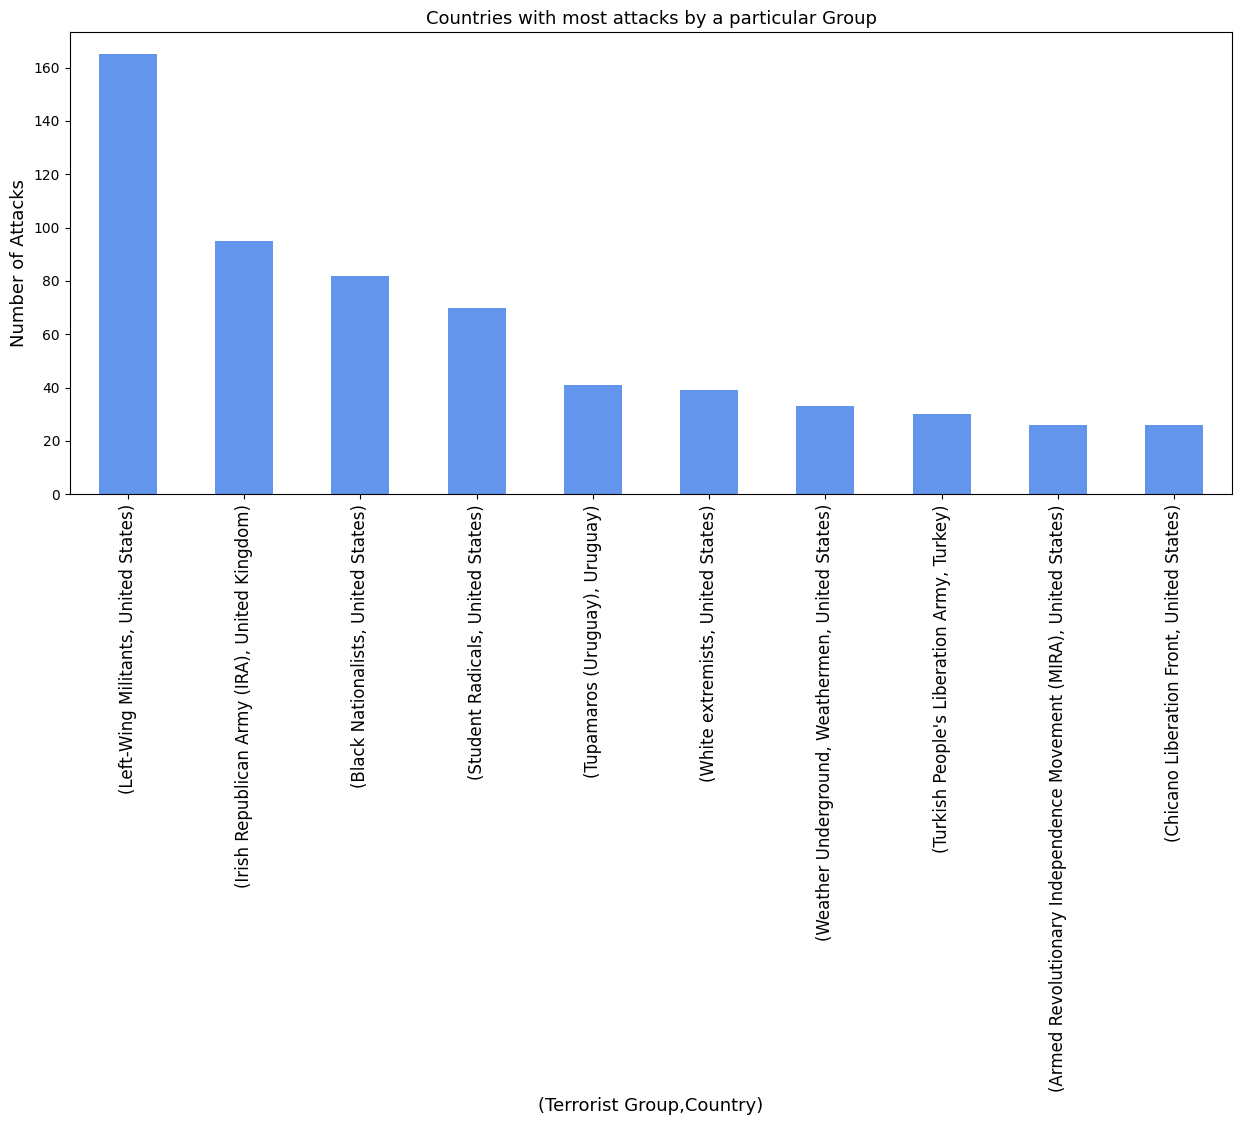

In [70]:
gca.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most attacks by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [71]:
gcc=df[["Group Name","Country","Casualty"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)
gcc

<ipython-input-71-eaf64a6f7a91>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcc=df[["Group Name","Country","Casualty"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)


,,Casualty
Group Name,Country,
Irish Republican Army (IRA),United Kingdom,305.0
Black Panthers,United States,73.0
"Popular Front for the Liberation of Palestine, Gen Cmd (PFLP-GC)",Switzerland,47.0
Black Nationalists,United States,46.0
White extremists,United States,37.0
Croatian Nationalists,Czechoslovakia,26.0
Ulster Volunteer Force (UVF),United Kingdom,22.0
Jewish Defense League (JDL),United States,18.0
Popular Front for the Liberation of Palestine (PFLP),West Germany (FRG),17.0


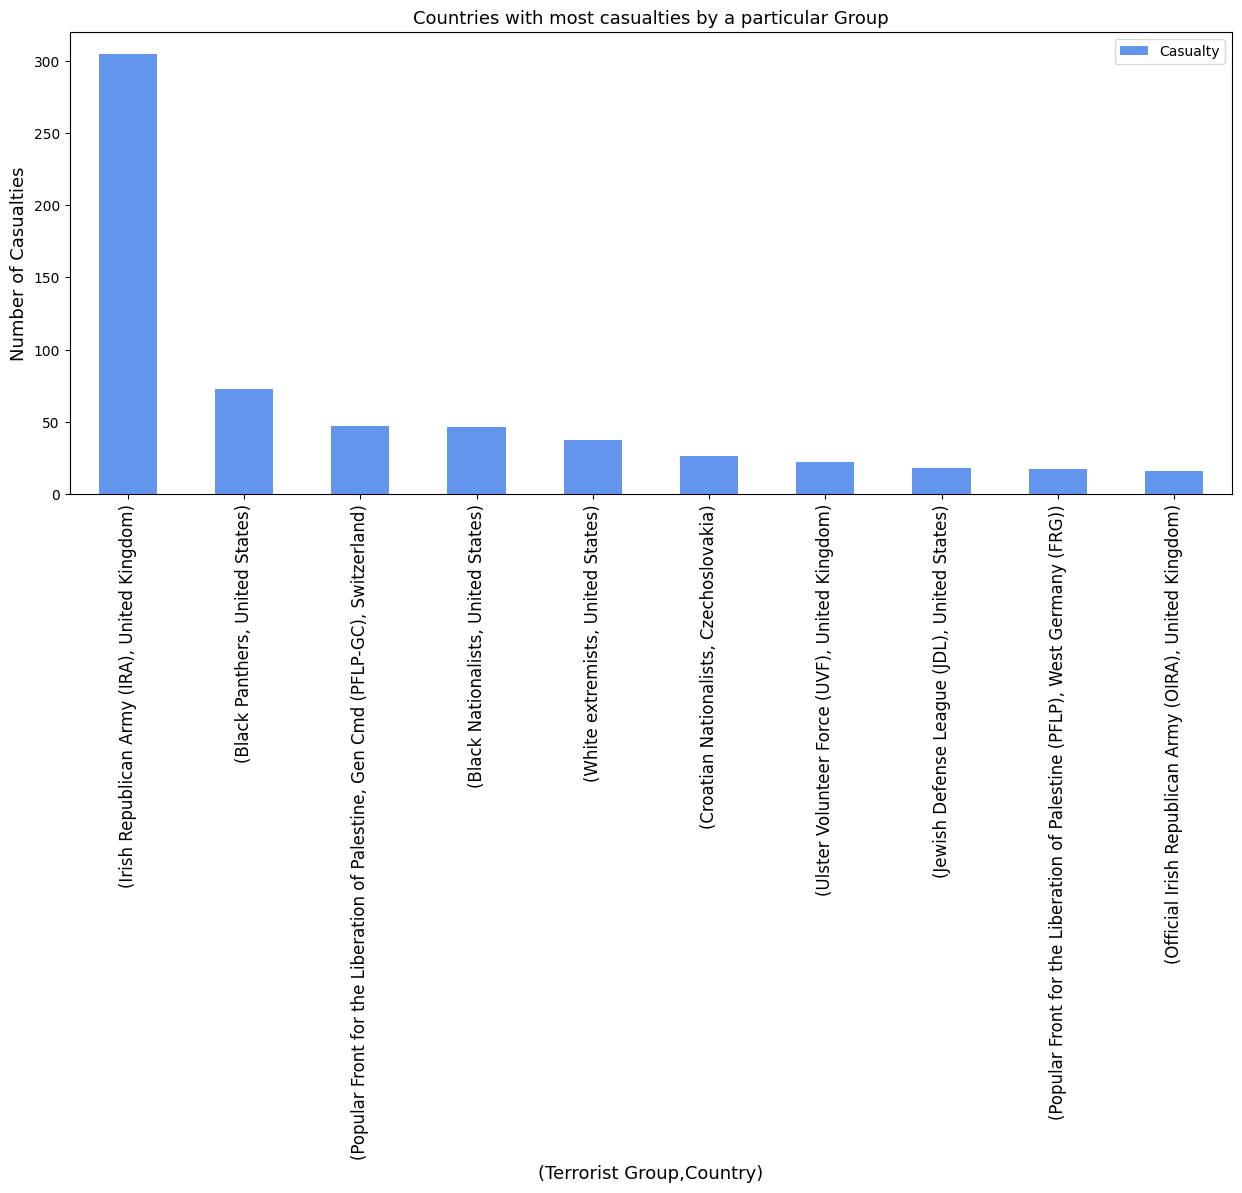

In [72]:
gcc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most casualties by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [73]:
gck=df[["Group Name","Country","Killed"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)
gck

<ipython-input-73-e36c2164dccc>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gck=df[["Group Name","Country","Killed"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)


,,Killed
Group Name,Country,
Irish Republican Army (IRA),United Kingdom,139.0
"Popular Front for the Liberation of Palestine, Gen Cmd (PFLP-GC)",Switzerland,47.0
Croatian Nationalists,Czechoslovakia,26.0
Ulster Volunteer Force (UVF),United Kingdom,21.0
Official Irish Republican Army (OIRA),United Kingdom,16.0
Black Nationalists,United States,16.0
Black Liberation Army,United States,11.0
Popular Front for the Liberation of Palestine (PFLP),West Germany (FRG),8.0
Irish Republican Extremists,United Kingdom,8.0


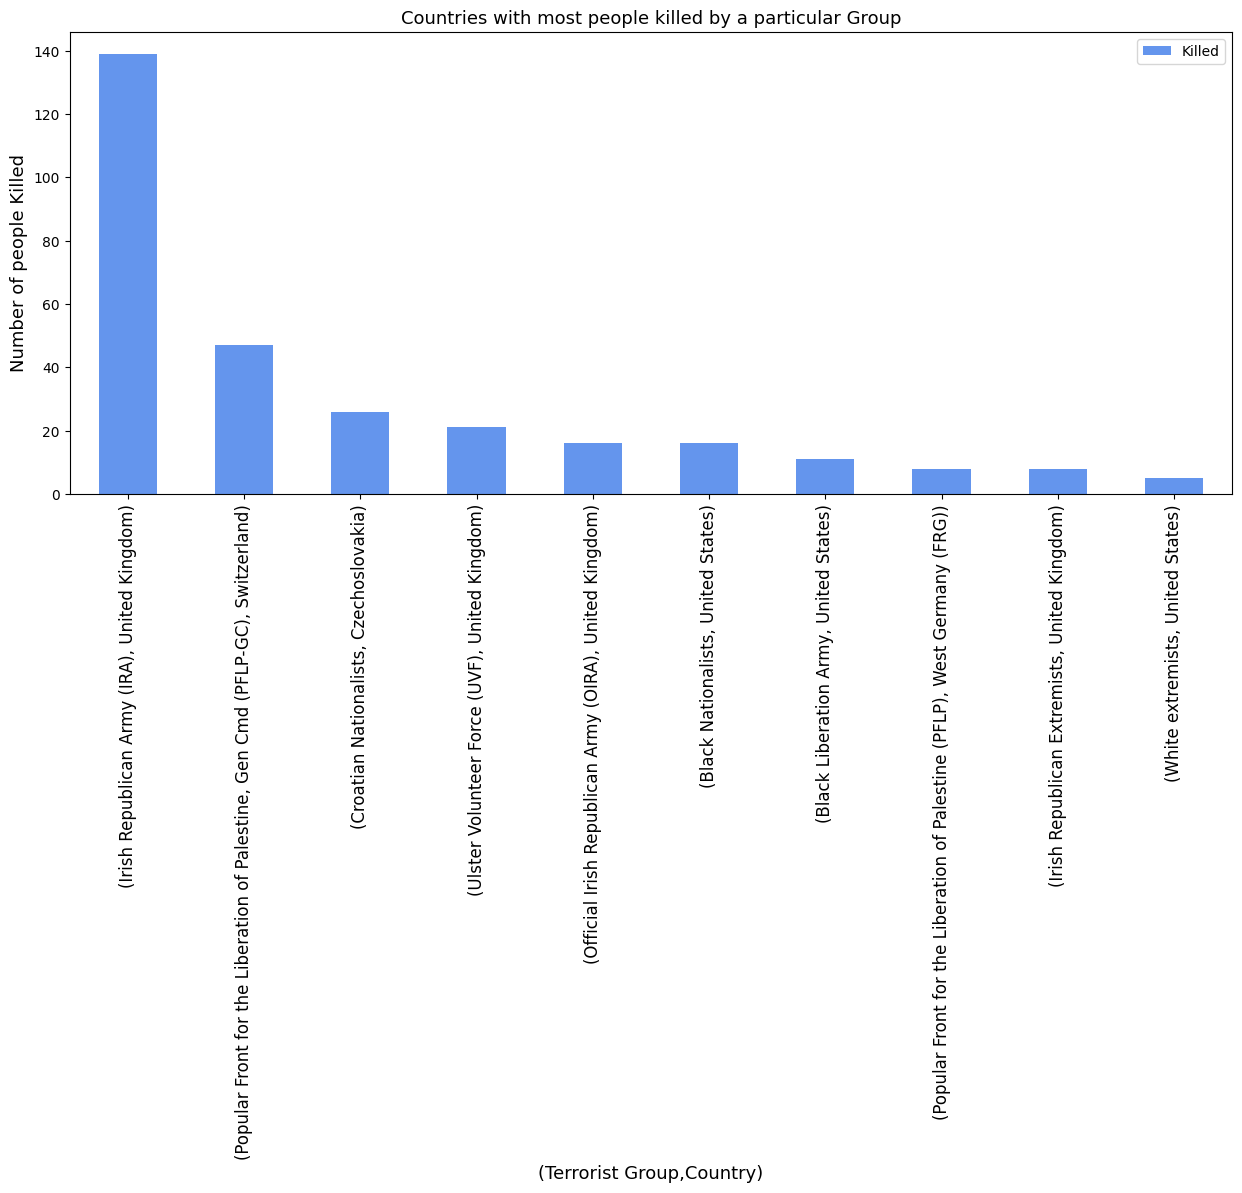

In [74]:
gck.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most people killed by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Killed",fontsize=13)
plt.show()

In [75]:
gcw=df[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)
gcw

<ipython-input-75-c01c65ff58a6>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcw=df[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)


,,Wounded
Group Name,Country,
Irish Republican Army (IRA),United Kingdom,166.0
Black Panthers,United States,68.0
White extremists,United States,32.0
Black Nationalists,United States,30.0
Jewish Defense League (JDL),United States,16.0
Stop the War Coalition,United States,12.0
Armed Revolutionary Independence Movement (MIRA),United States,11.0
Popular Front for the Liberation of Palestine (PFLP),West Germany (FRG),9.0
Left-Wing Militants,United States,6.0


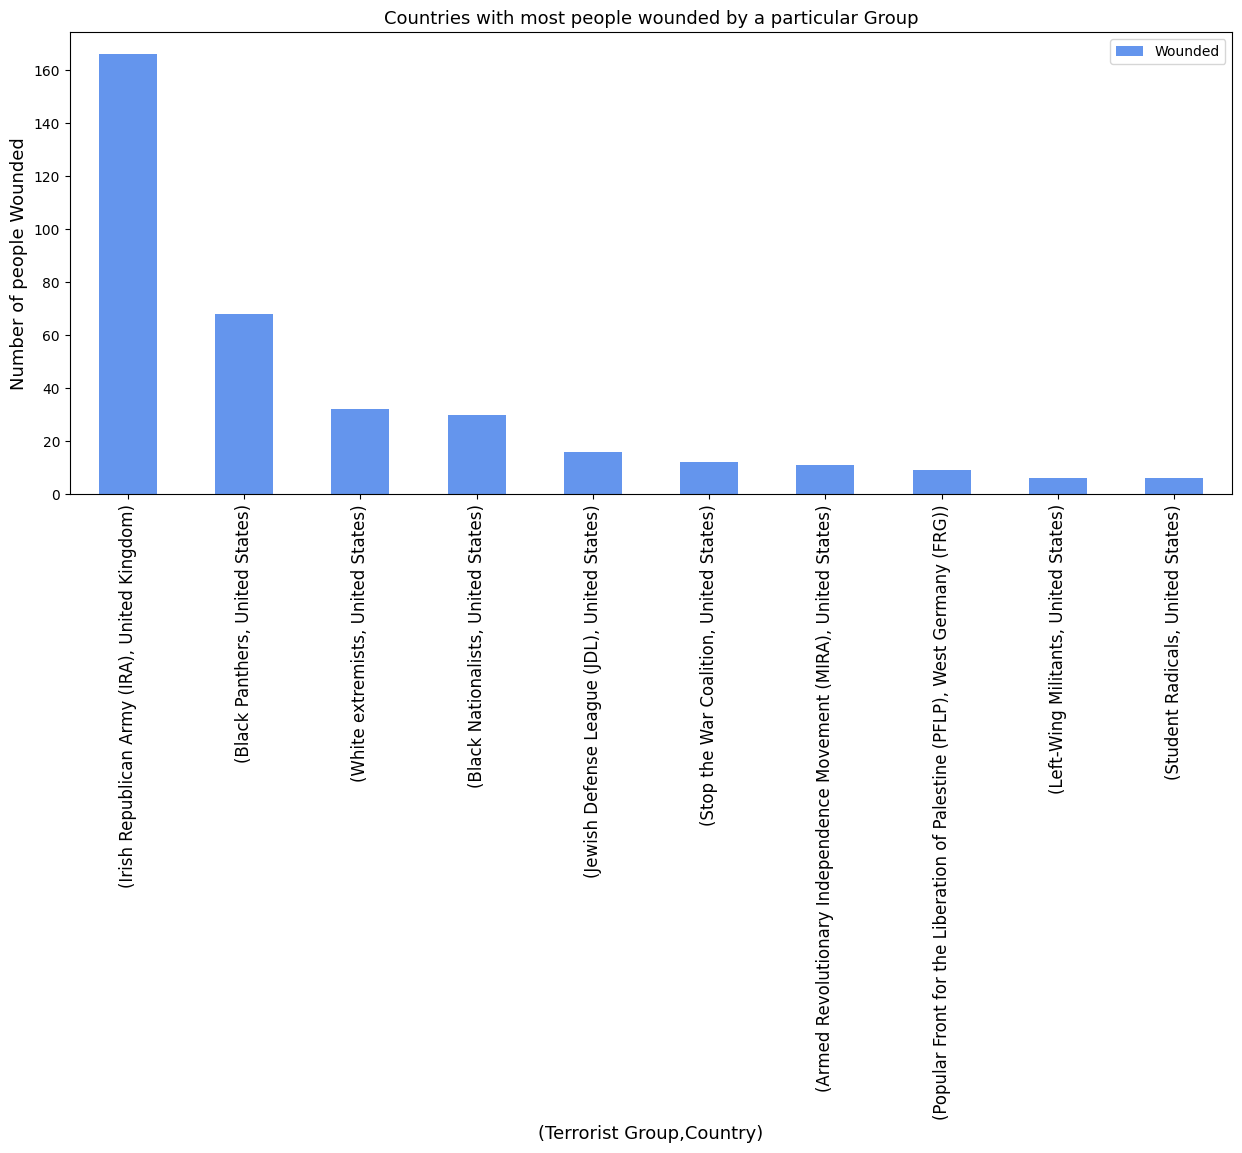

In [76]:
gcw.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most people wounded by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Wounded",fontsize=13)
plt.show()

In [77]:
casualty=df.loc[:,"Casualty"].sum()
print("Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :\n",casualty)

Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :
 975.0


In [78]:
kill=df.loc[:,"Killed"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",kill)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 441.0


In [79]:
wound=df.loc[:,"Wounded"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",wound)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 534.0
